**MACHINE LEARNING PARA CLASSIFICAÇÃO**

Este notebook apresenta um exercício prático de **Machine Learning para Classificação de Dados** utilizando as bibliotecas: **Pandas**, **Scikit-Learn**, **Matplotlib** e **Seaborn** do Python.

Será utilizado um conjunto de dados formatado como texto delimitado (CSV) contendo dados de pacientes mulheres gravidas. O objetivo é realizar uma previsão que indique a probabilidade da paciente desenvolver diabetes gestacional usando informações clínicas e de saúde da própria pessoa como variáveis preditoras. Serão consideradas as seguintes técnicas de treinamento de modelos de Machine Learning:

- Ingestão de dados.
- Separação dos dados.
- Treinamento do modelo de Machine Learning.
- Avaliação estatística dos resultado.
- Avaliação gráfica dos resultados.

1 - Instalação das Bibliotecas

In [ ]:
# Instalação do Pandas para manipulação de dados.
!pip install pandas

# Instalação do Scikit-Learn para modelagem de machine learning.
!pip install scikit-learn

# Instalação do Matplotlib para criação de gráficos.
!pip install matplotlib

# Instalação do Seaborn para criação de gráficos mais estéticos.
!pip install seaborn

2 - Importação das Bibliotecas

In [1]:
# Usada para manipulação de dados.
import pandas

# Usadas para construir os modelos de machine learning.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Usada para separação dos dados.
from sklearn.model_selection import train_test_split

# Usada para avaliar o desempenho do machine learning.
from sklearn.metrics import accuracy_score, confusion_matrix

# Usadas para construir gráficos.
import seaborn
import matplotlib.pyplot as pyplot

3 - Ingestão de Dados

O conjunto de dados contém informações coletadas pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais de Mulheres dos Estados Unidos (EUA) em um período de gravidez. Ele contém as seguintes colunas:

- **ID**: identificador único para cada paciente.
- **Gravidez**: quantidade de semanas de gravidez.
- **Glicose**: concentração de glicose no sangue.
- **Pressão Arterial**: pressão arterial diastólica.
- **Espessura do Triceps**: espessura da dobra da pele do tríceps.
- **Insulina**: insulina sérica de 2 horas.
- **IMC**: índice de massa corporal.
- **Predisposição Genética**: medida de predisposição genética para diabetes (histórico familiar).
- **Idade**: idade da pessoa em anos. 
- **Diabética**: indica se tem diabetes ou não (1 - diabetes; 0 não tem diabetes).

In [8]:
# Define o caminho do arquivo de texto delimitado.
arquivo = "Diabetes.csv"

# Carrega o arquivo de texto delimitado.
df = pandas.read_csv(arquivo, sep=";", decimal=".", encoding="utf-8")

# Exibe os dados carregados.
display(df.head(15))
print(df.info())
print(df.describe())
print(df.shape)

,ID,Gravidez,Glicose,Pressão Arterial,Espessura do Triceps,Insulina,IMC,Predisposição Genética,Idade,Diabética
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      10000 non-null  int64  
 1   Gravidez                10000 non-null  int64  
 2   Glicose                 10000 non-null  int64  
 3   Pressão Arterial        10000 non-null  int64  
 4   Espessura do Triceps    10000 non-null  int64  
 5   Insulina                10000 non-null  int64  
 6   IMC                     10000 non-null  float64
 7   Predisposição Genética  10000 non-null  float64
 8   Idade                   10000 non-null  int64  
 9   Diabética               10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB
None
                 ID     Gravidez       Glicose  Pressão Arterial  \
count  1.000000e+04  10000.00000  10000.000000      10000.000000   
mean   1.502122e+06      3.25580    107.850200         71.20750

4 - Separação dos Dados

In [3]:
# Divide os dados para treinamento e validação.
df_treino, df_teste = train_test_split(df, test_size=0.3, random_state=42)

# Separa as variáveis independentes (X) e dependente (y) de treinamento.
X_treino = df_treino[
    [
        "Gravidez",
        "Glicose",
        "Pressão Arterial",
        "Espessura do Triceps",
        "Insulina",
        "IMC",
        "Predisposição Genética",
        "Idade",
    ]
]
Y_treino = df_treino["Diabética"]

# Separa as variáveis independentes (X) e dependente (y) de validação.
X_teste = df_teste[
    [
        "Gravidez",
        "Glicose",
        "Pressão Arterial",
        "Espessura do Triceps",
        "Insulina",
        "IMC",
        "Predisposição Genética",
        "Idade",
    ]
]
Y_teste = df_teste["Diabética"]

5 - Treinamento do Modelo de Machine Learning

In [4]:
# Cria o modelo de Regressão Logística.
modelo_RLog = LogisticRegression(random_state=42)

# Ajusta o modelo de Regressão Logística aos dados.
modelo_RLog.fit(X_treino, Y_treino)

# Cria o modelo de SVC (Support Vector Classifier).
modelo_SVC = SVC(random_state=42)

# Ajusta o modelo de SVC aos dados.
modelo_SVC.fit(X_treino, Y_treino)

c:\Users\Renan Rodrigues\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(random_state=42)

6 - Avaliação Estatística dos Resultados

In [5]:
# Faz as previsões usando os modelos de machine learning criados.
RLog_previstos = modelo_RLog.predict(X_teste)
SVC_previstos = modelo_SVC.predict(X_teste)

# Calcula as métricas estatísticas para avaliar o modelo de Regressão Logística.
RLog_acuracia = accuracy_score(Y_teste, RLog_previstos)
RLog_matriz_confusa = confusion_matrix(Y_teste, RLog_previstos)
RLog_erro = 1 - RLog_acuracia

# Exibe os resultados para o modelo de Regressão Logística (RLog).
print("Resultados do Modelo de Regressão Logística:")
print(f"Acurácia: {RLog_acuracia:.2f}")
print(f"Erro: {RLog_erro:.2f}")

# Calcula as métricas estatísticas para avaliar o modelo de SVC (Support Vector Classifier).
SVC_acuracia = accuracy_score(Y_teste, SVC_previstos)
SVC_matriz_confusa = confusion_matrix(Y_teste, SVC_previstos)
SVC_erro = 1 - SVC_acuracia

# Exibe os resultados para o modelo de SVC (Support Vector Classifier).
print("Resultados do Modelo SVC:")
print(f"Acurácia: {SVC_acuracia:.2f}")
print(f"Erro: {SVC_erro:.2f}")

Resultados do Modelo de Regressão Logística:
Acurácia: 0.80
Erro: 0.20
Resultados do Modelo SVC:
Acurácia: 0.81
Erro: 0.19


7 - Avaliação Gráfica dos Resultados

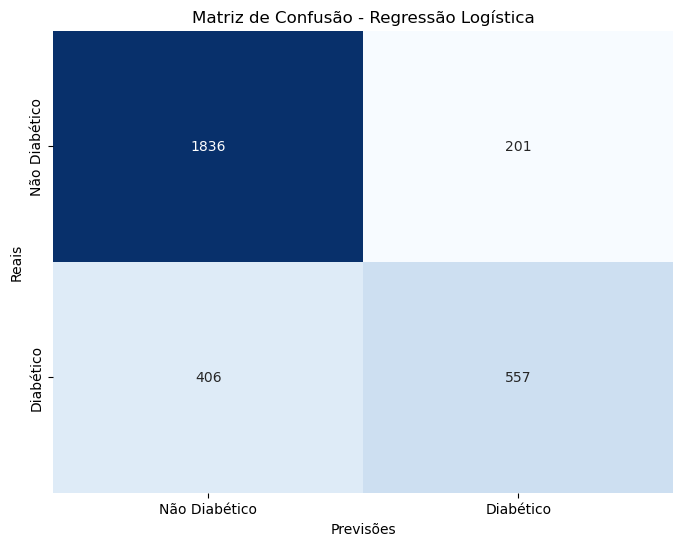

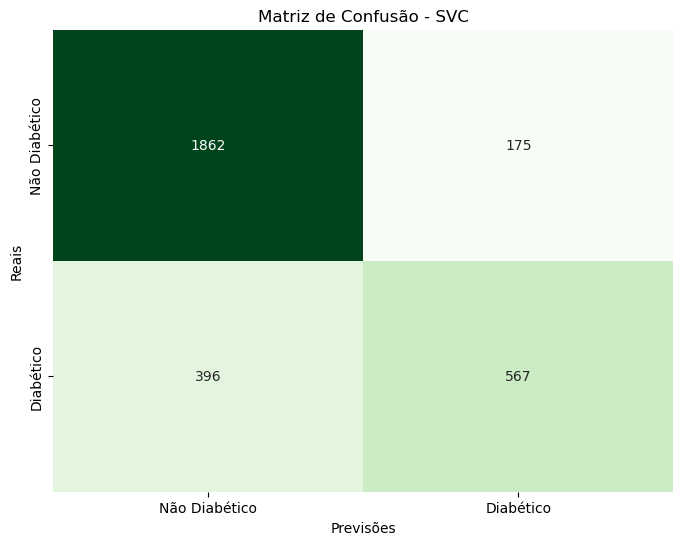

In [6]:
# Define os rótulos
rotulos = ["Não Diabético", "Diabético"]

# Construção do gráfico da matriz de confusão da Regressão Logística.
pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    RLog_matriz_confusa,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=rotulos,
    yticklabels=rotulos,
)
pyplot.title("Matriz de Confusão - Regressão Logística")
pyplot.xlabel("Previsões")
pyplot.ylabel("Reais")
pyplot.show()

# Construção do gráfico da matriz de confusão do SVC (Support Vector Classifier).
pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    SVC_matriz_confusa,
    annot=True,
    fmt="d",
    cmap="Greens",
    cbar=False,
    xticklabels=rotulos,
    yticklabels=rotulos,
)
pyplot.title("Matriz de Confusão - SVC")
pyplot.xlabel("Previsões")
pyplot.ylabel("Reais")
pyplot.show()

8 - Consumo dos Modelos de Machine Learning

In [ ]:
# Inserção manual dos valores para previsão de diagnóstico.
entradas = {
    "Gravidez": 2,
    "Glicose": 120,
    "Pressão Arterial": 70,
    "Espessura do Triceps": 22,
    "Insulina": 80,
    "IMC": 28.5,
    "Predisposição Genética": 0.45,
    "Idade": 33,
}

# Cria um Data Frame com os valores inseridos.
df_entradas = pandas.DataFrame([entradas])

# Escolha do modelo de classificação.
escolha = "SVC"
while True:
    escolha = input("Escolha o modelo para previsão (RLog ou SVC): ").lower()
    if escolha not in ["rlog", "svc"]:
        break
    # Realiza a previsão com o modelo escolhido.
    if escolha == "rlog":
        estimativa = modelo_RLog.predict(df_entradas)
        print(
            f"Diagnóstico com Regressão Logística: {'Diabética' if estimativa[0] == 1 else 'Não Diabética'}"
        )

    elif escolha == "svc":
        estimativa = modelo_SVC.predict(df_entradas)
        print(
            f"Diagnóstico com SVC: {'Diabética' if estimativa[0] == 1 else 'Não Diabética'}"
        )

    else:
        print("Modelo escolhido inválido. Por favor, escolha: 'RLog' ou 'SVC'.")

Modelo escolhido inválido. Por favor, escolha: 'RLog' ou 'SVC'.
Diagnóstico com SVC: Não Diabética
Modelo escolhido inválido. Por favor, escolha: 'RLog' ou 'SVC'.
